In [1]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Dataset clustering with Kmeans

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
classes = df.species
objects = df.drop(['species'],axis=1)

In [4]:
km=KMeans(n_clusters=3) # create a KMeans object
km.fit(objects) # compute the clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Measures

In [5]:
# SSE
sse = km.inertia_
print("sse = ",sse)

sse =  78.85144142614601


In [6]:
# Get SSE when varying the number of clusters
sse_list = []
for i in range(2,11):
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)
    

[152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.066035353535355, 34.299712121212124, 30.063110617452725, 27.86142885623149, 26.096532003084636]


Text(0, 0.5, 'SSE')

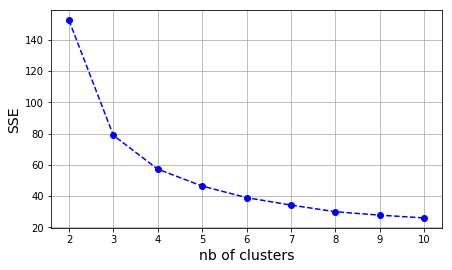

In [7]:
fig = plt.figure(figsize=(7, 4))
plt.plot(range(2,11),sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

La SSE diminue avec le nombre de clustrs - logique car au final nb de clusters = nb de points
On s'intéresse donc au fort GAIN de la SSE (entre 2 et 3 clusters par exemple)

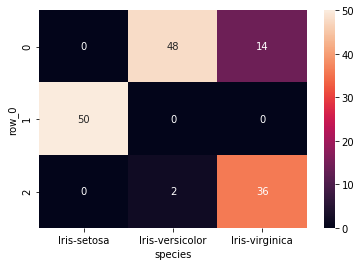

In [8]:
# Contingency table of species vs cluster labels, needed to compute entropy
clusters = km.labels_ # get cluster labels for all objects
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

Table de contingence - compare les quantité dans les clusters et dans les classes réelles

In [9]:
# entropy
proba = crosstab.values/crosstab.values.sum(axis=1, keepdims=True) # divide each element of a row by the sum of the row
print(proba)
entropy = [stats.entropy(row, base=2) for row in proba]
print("entropy of each cluster: ", entropy)

[[0.         0.77419355 0.22580645]
 [1.         0.         0.        ]
 [0.         0.05263158 0.94736842]]
entropy of each cluster:  [0.7706290693639406, 0.0, 0.2974722489192897]


Entropie mésure le désordre à partir la table de contingence (calcul avec le -log(nc).
Entropie nulle signifie que le cluster est pure (correspond à une classe)
Entropie élevée correspond à un grand désordre entre les classes et les clusters

In [10]:
# NMI
metrics.normalized_mutual_info_score(classes, clusters, average_method='max')

0.7514854021988339

Compare la similarité entre les classes et les clusters

In [11]:
# average silhouette coeeficient
metrics.silhouette_score(objects.values, clusters, metric='euclidean', sample_size=None) # sample_size=None for no sampling 

0.5528190123564102

Plus le couefficient de la silhouette, il est élevé, mieux c'est
Compare la distance intrapoints avec la distance des points du cluster le plus proche.